In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle
import sys

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

2.5.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]


**Answer**: 

Overfitting happens when the model is trained too well on the training data. The model learns every nuance of the training data, including its noise, and the model is said to have a very high variance. Overfitting is indicated by an increase in validation loss as you run more epochs on the model. The training loss keeps on decreasing and becomes too minuscule. Also, the validation accuracy doesn't improve. Since the validation data is different from the train data, the model cannot generalize properly on the val set due to overfitting.

In our network, we are training a CNN model with too many filters without any regularization. This leads it to overfit on the MNIST dataset. The plot for the loss vs. epoch and accuracy vs. epoch is shown below.

As it is evident, the loss of validation data increases after certain epochs, which is a clear indicator of overfitting. Similarly, accuracy on Val data doesn't increase.


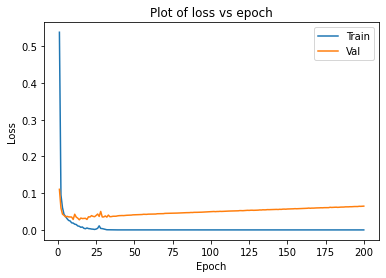

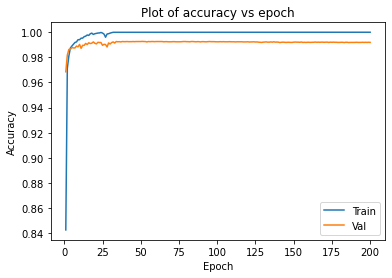

2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]

**Answer**:

Since an overfit model learns very detailed nuances of the training set, it might fail to perform well on the test set as it won't be able to generalize well on the test set. When such a model is deployed for a classification task, the test accuracy is less. Similarly, when it gets deployed for a regression task, the best fit line doesn't give correct results for the test set. 

Such a model makes very fine boundaries for a classification task, which means that it will try to fit every data point by making the model unnecessarily complex. For example, if we take a binary classification task, the model will try to curve boundaries around every point. It might even try to fit the outliers so that the training loss is minimized to the maximum extent. This phenomenon distorts the model and makes it further complex. It might fail to judge a data point in its correct class because of this distortion. 

3.   Name two ways to avoid this. [+2 answer, +2 answer]

**Answer**: 

To ways to avoid overfitting are:

a. Early stopping - While training the model, we should keep track of the validation loss on held-out data. If the validation loss doesn't decrease after a specified number of epochs, the training should be stopped. This makes sure that we are not training our model too much and prevents overfitting.

b. Regularization - This technique helps reduce the variance of the model by forcing it to be simpler to some extent.  There are multiple ways in which a regularizer can be added to the network. Dropout is one method where some nodes of the deep neural network are dropped during training to make the system more robust. Some ways modify the loss function to include a regularization parameter.

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]
 
**Answer**:
 
Dropout is a technique where some nodes for each layer in a deep neural network are randomly dropped during training the model. The choice of which nodes to drop is completely random, and the probability of dropping a node can be set as a hyperparameter or defined by the user. Dropout makes the network more robust to noisy data. 
 
We introduce a dropout in our network after every layer except after the input layer and before the output layer. The validation loss doesn't increase after certain epochs, while the validation accuracy is also higher this time. This phenomenon is visible in the plot as well. Since we drop the nodes while training, the model is more robust, and its impact is visible in the validation accuracy and loss. We can prevent overfitting the model by introducing the dropout.

Plots are attached below for accuracy and loss.

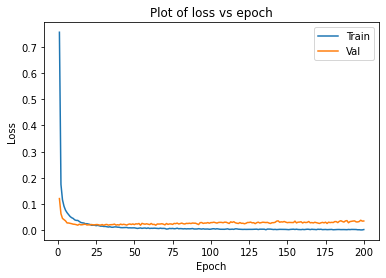

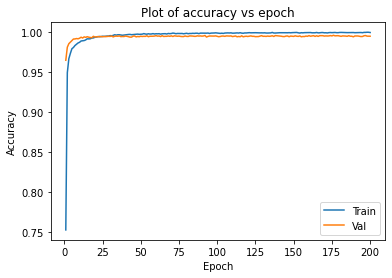

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for Use. What uses can you brainstorm?  [+5 bonus makeup points]
  
**Answer**: 

If we separate encoder and decoder after training as a single unit, such a method can have multiple usages:

a. Use of encoder: A trained encoder can be used as a network to generate features for images. Since the encoder creates a low dimensional representation of the input image, it can be used for transfer learning. We can take a dataset and encode it using the trained network. The encoded feature representation can be used further for classification. Such a system won't need to be trained on an end-to-end basis, and only the final few layers can be tuned. Networks such a VGG16, ResNet, etc. are widely used to encode an image for further downstream tasks.

b. Use of decoder: The decoder takes the low-dimensional feature representation of an encoder and generates(reconstructs) input data back from it. A trained decoder, when used in isolation, can be used as a generator network. They are also used for transfer learning. An encoder representation of an image from one domain, when used with a decoder trained on another domain, will transfer the features of one domain onto another. A simple example is neural style transfer. We train an autoencoder on image paintings from a famous painter and detach the decoder separately after training. Take a standard current-day image, pass it through any encoder (VGG or Resnet) to encode it into a feature space. Use that encoded feature representation as input to our decoder, which will transfer the artistic style of the painter on our image. Since the decoder has been trained on painting data, we can achieve this feat. 

It can also be used for text style transfer wherein a current day essay can be converted to Shakesperean style text using a similar encoder-decoder framework.

**2.1 Linear AE points for constructed model, no questions here.**

I construct a Linear Autoencoder using the specified parameters. Attached below are the loss plot, and reconstruction of input images. As is evident, the training and validation loss decreases similary with increasing epoch.
The reconstruction of input image in the next plot also seem perfect which is an indication that our autoencoder works perfectly.

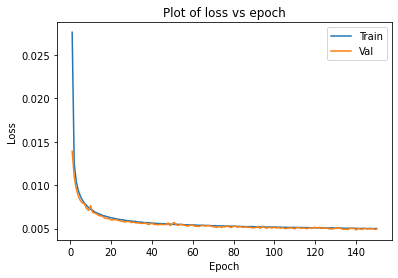

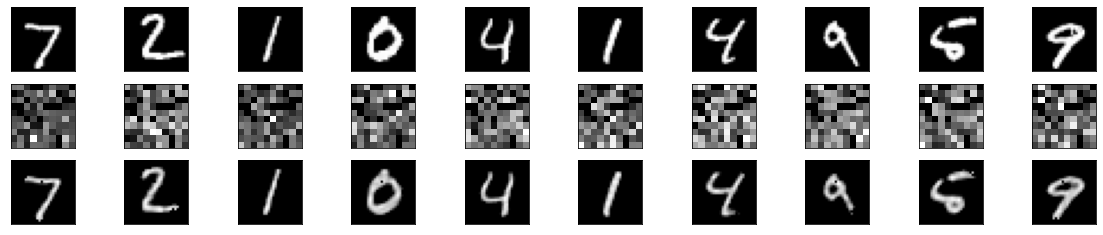

**2.2 Convolutional AE points for constructed model, no questions here.**

I construct a Convolutional Autoencoder using the specified parameters. Attached below are the loss plot, and reconstruction of input images. As is evident, the training and validation loss decreases similary with increasing epoch.
The reconstruction of input image in the next plot also seem perfect which is an indication that our autoencoder works perfectly.

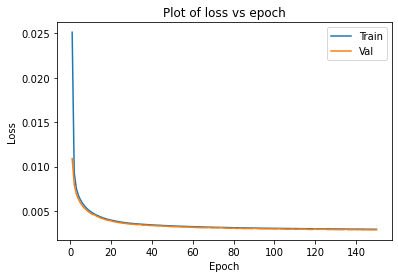

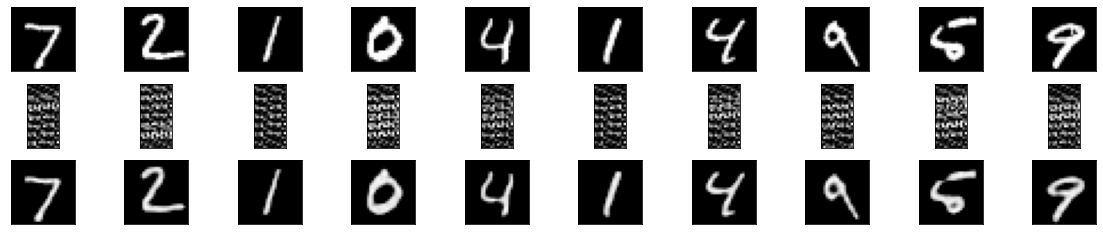

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]

**Answer**

* Problem: I am tasked with finding the anomaly in this problem. So, I built an autoencoder network that is trained on reconstructing normal spectrogram data. When anomaly data is passed through it, the Mean Squared Error (MSE) for reconstructing should be more than two standard deviations from the mean of MSE. According to these criteria, anomalies are detected. 
* Data: The normal input data has a shape (1000, 8, 64, 313). It means that there are 1000 examples, and each example has eight channels. I pad the data on the specific axis to make it 316. It ensures that the model doesn't run into this problem of non-matching sizes after convolution and de-convolution. So, the final train data size is (1000, 8, 64, 316). At the same time, during training,  20 % of data is kept separately for validation to keep track of our model performance during training and possibly stop it from overfitting.
* Model: I am using a convolutional autoencoder for this problem. Below mentioned is the network architecture
    * A 2D convolutional layer with 16 filters, kernel size 3 and relu activation followed by a max-pooling layer.
    * A 2D convolutional layer with 8 filters, kernel size 3, and relu activation followed by a max-pooling layer.
    * A 2D convolutional layer with 8 filters, kernel size 3, and relu activation followed by an upsampling layer.
    * A 2D convolutional layer with 16 filters, kernel size 3, and relu activation followed by an upsampling layer.
    * A 2D convolutional layer with 8 filters, kernel size 3, and sigmoid activation.
* Reason: Model is padded at every stage to make sure that dimensional for input and output match. I put sigmoid activation in the last layer because we want the output layer to have values between 0 and 1 in the normalized form. Similarly, relu activation in the previous layer stands as the standard activation function for convolutional layers, making sure that unwanted gradients are not backpropagated. 
* The model is trained with mean squared error loss, which helps in giving the reconstruction difference between input and output layer. It serves as a helpful metric in tasks where we need to find an error value of an element a wrt element b. 
* The mean of normal data is 57.4776 and standard deviation is 8.0744. This is on unnormalized dataset. If we normalize it using some standard normalization technique such as min-max normalizer, the number of anomalies detected are much more. 
* The confusion matrix for two standard deviations is as follows. I can detect 79 anomalies using my autoencoder model.


| TP 79 | TN 64 |
| ----- | ----- |
| FP 40 | FN 960 |

* Also attached below is the loss plot. The training loss decreases as we increase the epochs, and the validation loss also decreases. However, the validation loss is more than the training loss but stays almost parallel as seen in the plot below. I am using 20% of the training set as validation. A decrease in Loss is a clear indication that the model is learning to reconstruct normal data quite well.
* Below attached is the histogram plot as well. The anomalies count can be observed in the histogram plot after the two dashed lines, which mark the two standard deviations from our mean.

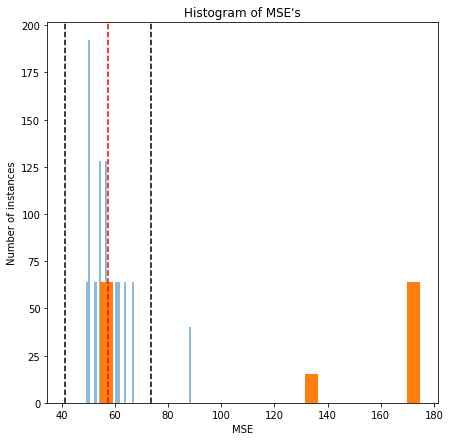

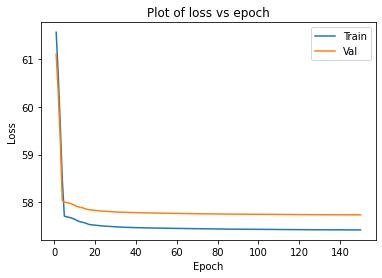

***Reminder: Achieve better than 75 anomalies***

In [4]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
#Normalize
data_train = data_train/255.0
data_test = data_test/255.0
#Reshape
data_train = data_train.reshape([data_train.shape[0], data_train.shape[1], data_train.shape[2], 1])
data_test = data_test.reshape([data_test.shape[0], data_test.shape[1], data_test.shape[2], 1])

#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [4]:
#Create and train model architecture
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    
    #### Fill in Model ####
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(data_train.shape[1],data_train.shape[2],1)))
    model.add(tf.keras.layers.Conv2D(256, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 7s 119us/sample - loss: 0.5385 - accuracy: 0.8426 - val_loss: 0.1106 - val_accuracy: 0.9685
Epoch 2/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0953 - accuracy: 0.9712 - val_loss: 0.0597 - val_accuracy: 0.9818
Epoch 3/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0606 - accuracy: 0.9811 - val_loss: 0.0428 - val_accuracy: 0.9863
Epoch 4/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0426 - accuracy: 0.9875 - val_loss: 0.0398 - val_accuracy: 0.9864
Epoch 5/200
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0363 - accuracy: 0.9890 - val_loss: 0.0353 - val_accuracy: 0.9878
Epoch 6/200
60000/60000 [==============================] - 4s 63us/sample - loss: 0.0306 - accuracy: 0.9905 - val_loss: 0.0370 - val_accuracy: 0.9875
Epoch 7/200
60000/60000 [========================

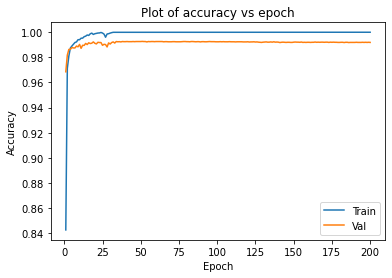

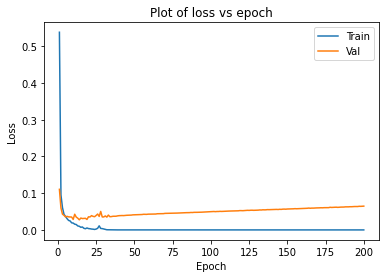

In [27]:
#Plot accuracy vs epoch
plt.subplot(1,1,1)

#### Fill in plot ####
epoch = list(range(1,201))
train_acc = history_overfit.history['accuracy']
val_acc = history_overfit.history['val_accuracy']
plt.plot(epoch, train_acc, label = 'Train')
plt.plot(epoch, val_acc, label = 'Val')
plt.legend(loc="lower right")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot of accuracy vs epoch')
plt.show()

#Plot loss vs epoch
plt.subplot(1,1, 1)
epoch = list(range(1,201))
train_loss = history_overfit.history['loss']
val_loss = history_overfit.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()



#### Fill in plot ####


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [28]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(data_train.shape[1],data_train.shape[2],1)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(256, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 4s 70us/sample - loss: 0.5368 - accuracy: 0.8397 - val_loss: 0.1509 - val_accuracy: 0.9629
Epoch 2/200
60000/60000 [==============================] - 4s 64us/sample - loss: 0.1138 - accuracy: 0.9649 - val_loss: 0.0776 - val_accuracy: 0.9803
Epoch 3/200
60000/60000 [==============================] - 4s 62us/sample - loss: 0.0775 - accuracy: 0.9763 - val_loss: 0.0662 - val_accuracy: 0.9825
Epoch 4/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0626 - accuracy: 0.9801 - val_loss: 0.0595 - val_accuracy: 0.9840
Epoch 5/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0530 - accuracy: 0.9838 - val_loss: 0.0528 - val_accuracy: 0.9860
Epoch 6/200
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0441 - accuracy: 0.9865 - val_loss: 0.0482 - val_accuracy: 0.9888
Epoch 7/200
60000/60000 [=========================

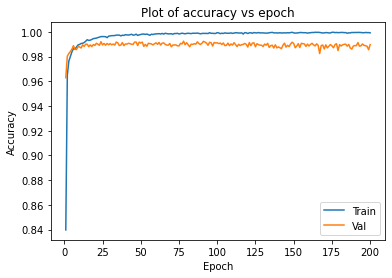

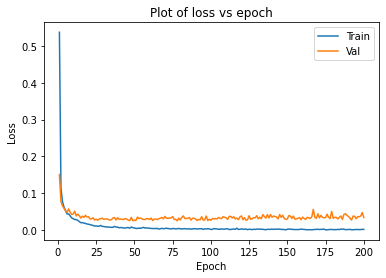

In [29]:
#Plot accuracy vs epoch
plt.subplot(111)

#### Fill in plot ####
epoch = list(range(1,201))
train_acc = history_dropout_hidden.history['accuracy']
val_acc = history_dropout_hidden.history['val_accuracy']
plt.plot(epoch, train_acc, label = 'Train')
plt.plot(epoch, val_acc, label = 'Val')
plt.legend(loc="lower right")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot of accuracy vs epoch')
plt.show()

#Plot loss vs epoch
plt.subplot(111)
epoch = list(range(1,201))
train_loss = history_dropout_hidden.history['loss']
val_loss = history_dropout_hidden.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()

#### Fill in plot ####


In [5]:
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(shape=(data_train.shape[1],data_train.shape[2],1)))
    model.add(tf.keras.layers.Conv2D(256, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(128, kernel_size = 3, activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 8s 132us/sample - loss: 0.8293 - accuracy: 0.7211 - val_loss: 0.1294 - val_accuracy: 0.9616
Epoch 2/200
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1850 - accuracy: 0.9452 - val_loss: 0.0631 - val_accuracy: 0.9797
Epoch 3/200
60000/60000 [==============================] - 4s 71us/sample - loss: 0.1162 - accuracy: 0.9667 - val_loss: 0.0437 - val_accuracy: 0.9852
Epoch 4/200
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0925 - accuracy: 0.9725 - val_loss: 0.0378 - val_accuracy: 0.9876
Epoch 5/200
60000/60000 [==============================] - 4s 72us/sample - loss: 0.0753 - accuracy: 0.9786 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 6/200
60000/60000 [==============================] - 4s 73us/sample - loss: 0.0655 - accuracy: 0.9815 - val_loss: 0.0303 - val_accuracy: 0.9900
Epoch 7/200
60000/60000 [========================

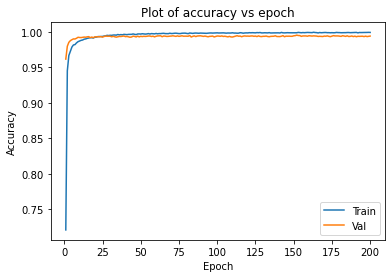

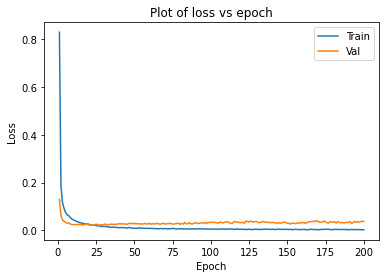

In [6]:
#Plot accuracy vs epoch
plt.subplot(111)

#### Fill in plot ####
epoch = list(range(1,201))
train_acc = history_dropout_hidden.history['accuracy']
val_acc = history_dropout_hidden.history['val_accuracy']
plt.plot(epoch, train_acc, label = 'Train')
plt.plot(epoch, val_acc, label = 'Val')
plt.legend(loc="lower right")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot of accuracy vs epoch')
plt.show()

#Plot loss vs epoch
plt.subplot(111)
epoch = list(range(1,201))
train_loss = history_dropout_hidden.history['loss']
val_loss = history_dropout_hidden.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()

#### Fill in plot ####


# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [32]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape([data_train.shape[0],data_train.shape[1] * data_train.shape[2]])
data_test_reshape_fcae = data_test.reshape([data_test.shape[0],data_test.shape[1] * data_test.shape[2]])

In [33]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    
    model.add(tf.keras.layers.Input(shape = (784,)))
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dense(100, activation='relu'))
    
    # Decoder
    
    model.add(tf.keras.layers.Dense(200, activation='relu'))
    model.add(tf.keras.layers.Dense(400, activation='relu'))
    model.add(tf.keras.layers.Dense(784, activation='relu'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='mse', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0280 - val_loss: 0.0144
Epoch 2/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0130 - val_loss: 0.0115
Epoch 3/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0110 - val_loss: 0.0102
Epoch 4/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0100 - val_loss: 0.0095
Epoch 5/150
60000/60000 [==============================] - 1s 12us/sample - loss: 0.0093 - val_loss: 0.0090
Epoch 6/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0089 - val_loss: 0.0085
Epoch 7/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0085 - val_loss: 0.0083
Epoch 8/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.0083 - val_loss: 0.0081
Epoch 9/150
60000/60000 [==============================] - 1s 13us/sample - loss: 0.00

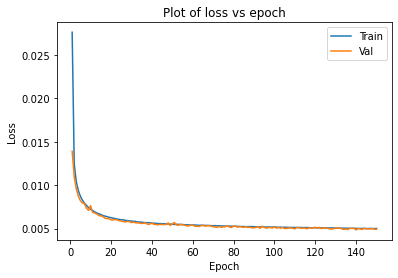

In [13]:
#Plot train/val loss vs epoch
epoch = list(range(1,151))
train_loss = history_deep_ae.history['loss']
val_loss = history_deep_ae.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()

#### Fill in plot ####


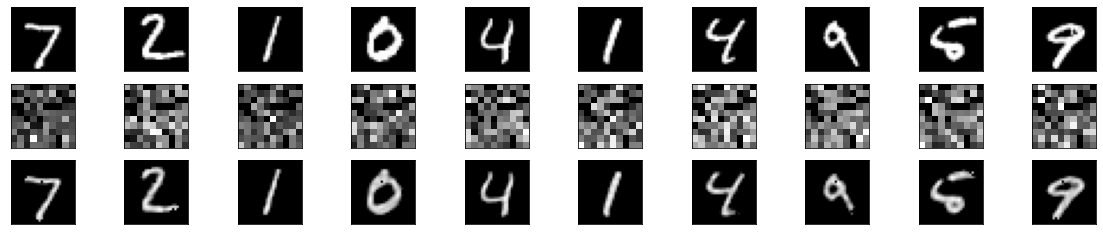

In [14]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%.
<br>  Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

In [4]:
#Reshape data to account for grayscale channel in each image
data_train_reshape_cae = data_train.reshape([data_train.shape[0], data_train.shape[1], data_train.shape[2], 1])
data_test_reshape_cae = data_test.reshape([data_test.shape[0], data_test.shape[1], data_test.shape[2], 1])
print(data_train_reshape_cae.shape)


(60000, 28, 28, 1)


In [ ]:
#Create Convolutional AutoEncoder Architecture
def cae():
    
    model = tf.keras.models.Sequential()
    #Encoder
    
    model.add(tf.keras.Input(shape=(28, 28, 1)))
    model.add(tf.keras.layers.Conv2D(16, kernel_size = 3, padding ='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(8, kernel_size = 3, padding ='same',  activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(8, kernel_size = 3, padding ='same', activation='relu'))

    #Decoder
    
    model.add(tf.keras.layers.UpSampling2D(size=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(16, kernel_size = 3, padding ='same', activation='relu'))
    model.add(tf.keras.layers.UpSampling2D(size=(2,2)))
    #model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(1, kernel_size = 3, padding ='same', activation='relu'))
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mse', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        1

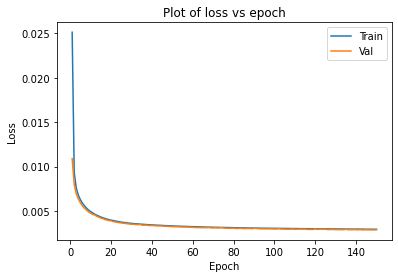

In [6]:
#Plot train/validation loss vs epoch

epoch = list(range(1,151))
train_loss = history_conv_ae.history['loss']
val_loss = history_conv_ae.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()

<Figure size 432x288 with 0 Axes>

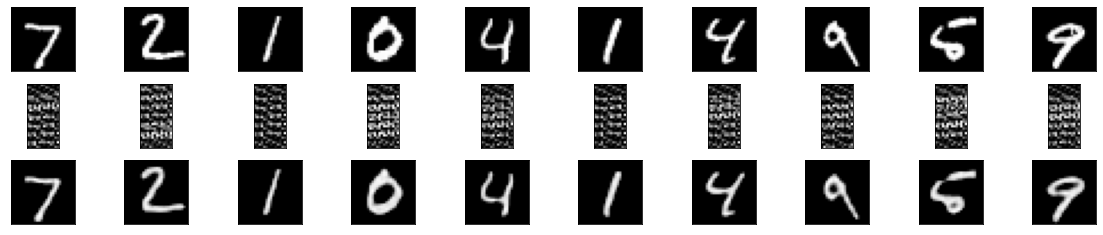

In [7]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [24]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

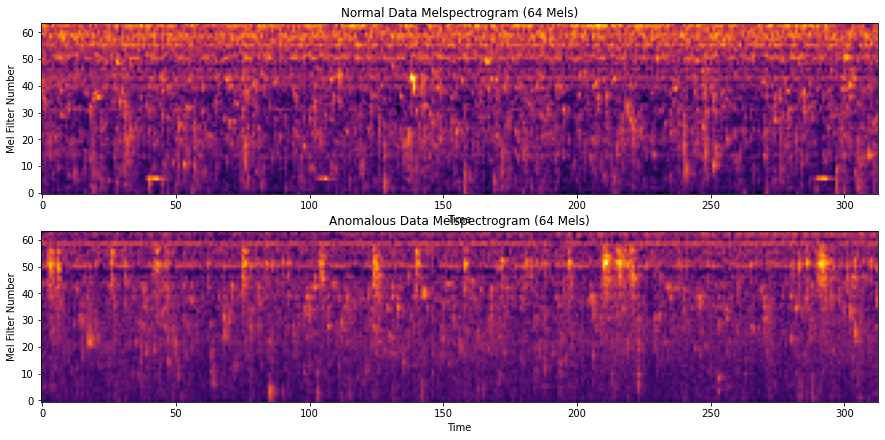

In [25]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [26]:
# Create your own Baseline autoencoder
# Model name is fixed for use by later code
autoencoderBASE = tf.keras.models.Sequential([
    #Encoder
    
    tf.keras.Input(shape=(64,316,8)),
    tf.keras.layers.Conv2D(16, kernel_size = 3, padding ='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(8, kernel_size = 3, padding ='same',  activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(8, kernel_size = 3, padding ='same', activation='relu'),

    #Decoder
    
    tf.keras.layers.UpSampling2D(size=(2,2)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(16, kernel_size = 3, padding ='same', activation='relu'),
    tf.keras.layers.UpSampling2D(size=(2,2)),
    #tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Conv2D(8, kernel_size = 3, padding ='same', activation='sigmoid')

])

In [27]:
# Load data
normal_data  = np.load('./training_data.npy')
anomaly_data = np.load('./test_data.npy')


In [3]:
# from tensorflow.keras.utils import normalize

# normal_data = normalize(normal_data, order = 2)
# anomaly_data = normalize(anomaly_data, order =2)

In [28]:
#### General steps to follow
# Set up the data (reshape, scale, etc...
# Initialize a loss function
# Compile a model
# Train a model

npad = ((0, 0), (0,0), (0,3), (0,0))
#Reshape data to account for grayscale channel in each image
normal_data_reshaped = np.transpose(normal_data, (0, 2, 3, 1))
normal_data_reshaped = np.pad(normal_data_reshaped, pad_width=npad, mode='constant', constant_values=0)
anomaly_data_reshaped  = np.transpose(anomaly_data, (0, 2, 3, 1))
anomaly_data_reshaped = np.pad(anomaly_data_reshaped, pad_width=npad, mode='constant', constant_values=0)
print(anomaly_data_reshaped.shape)
x_train, x_valid, y_train, y_valid= train_test_split(normal_data_reshaped, normal_data_reshaped, test_size=0.2, random_state=42)
print(autoencoderBASE.summary())
autoencoderBASE.compile(loss='mse', optimizer='adam')
history_autoencoderBASE = autoencoderBASE.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=150, batch_size=250, shuffle=True)
decoded_data = autoencoderBASE.predict(x_valid)




(143, 64, 316, 8)
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 64, 316, 16)       1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 158, 16)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 158, 8)        1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 79, 8)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 79, 8)         584       
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 32, 158, 8)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 

In [29]:
x_train =  np.reshape(x_train, (x_train.shape[0], 1, 64, 316, 8))
x_valid =  np.reshape(x_valid, ( x_valid.shape[0], 1, 64, 316, 8))
# print(x_train.shape, x_valid.shape)
# print(anomaly_data_reshaped.shape)
test = np.reshape(anomaly_data_reshaped , ( anomaly_data_reshaped.shape[0], 1, 64, 316, 8))
# print(test.shape)

In [30]:
lossMSE = tf.keras.losses.MeanSquaredError()

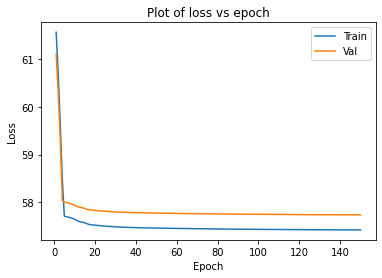

In [31]:
# Plot loss versus epoch.

#Plot train/validation loss vs epoch

epoch = list(range(1,151))
train_loss = history_autoencoderBASE.history['loss']
val_loss = history_autoencoderBASE.history['val_loss']
plt.plot(epoch, train_loss, label ='Train')
plt.plot(epoch, val_loss, label ='Val')
plt.legend(loc="upper right")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Plot of loss vs epoch')
plt.show()

The mean of normal data is 57.4776        and standard deviation is 8.0744


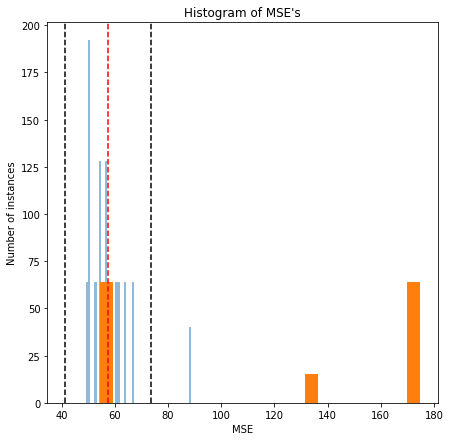

In [32]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((x_train,x_valid))))
for i, batch in dataset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test))
for i, batch in anomset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [33]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
tn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
fn_count = 1000 - fp_count

print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')

TP 79 	 TN 64
FP 40 	 FN 960
